In [1]:
import numpy as np
import pickle
import cv2
import os
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
DATADIR = "/home/yaan_uchiha29/CrowdAI/color"

CATEGORIES = ['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust',
 'Apple___healthy','Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy', 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot',
 'Peach___healthy', 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight',
 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [3]:
IMG_SIZE = 256

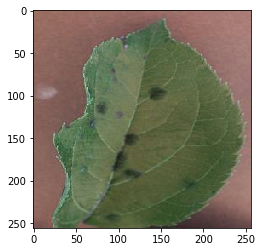

In [4]:
for category in CATEGORIES:  # do all categories
    path = os.path.join(DATADIR,category)  # create to all diseases
    for img in os.listdir(path):  # iterate over each image 
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [5]:
print(img_array)

[[[156 111 100]
  [157 112 101]
  [158 113 102]
  ...
  [168 124 117]
  [171 127 120]
  [172 128 121]]

 [[157 112 101]
  [158 113 102]
  [159 114 103]
  ...
  [170 126 119]
  [171 127 120]
  [173 129 122]]

 [[158 113 102]
  [158 113 102]
  [159 114 103]
  ...
  [171 127 120]
  [172 128 121]
  [173 129 122]]

 ...

 [[120  83  79]
  [121  84  80]
  [121  84  80]
  ...
  [103  75  75]
  [105  74  75]
  [105  74  75]]

 [[119  82  78]
  [120  83  79]
  [121  84  80]
  ...
  [103  75  75]
  [103  75  75]
  [103  75  75]]

 [[119  82  78]
  [120  83  79]
  [121  84  80]
  ...
  [103  75  75]
  [104  76  76]
  [104  76  76]]]


In [6]:
print(img_array.shape)

(256, 256, 3)


In [ ]:
from tqdm import tqdm

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 -371).

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                tf_convert_img_to_array = img_to_array(new_array)
                
                training_data.append([tf_convert_img_to_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

  0%|          | 0/1502 [00:00<?, ?it/s]

In [29]:
training_data[0][0]

array([[[ 0,  0,  4],
        [ 0,  3,  8],
        [ 0,  0,  3],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  3,  8],
        [ 0,  0,  4],
        [12, 19, 22],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  4],
        [ 0,  0,  4],
        [ 0,  0,  3],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [24]:
for sample in training_data[:10]:
    print(sample[1])

8
21
33
0
15
25
25
33
8
25


In [30]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

# X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[  0]
   [  0]
   [  4]
   ...
   [169]
   [155]
   [129]]

  [[154]
   [140]
   [116]
   ...
   [160]
   [151]
   [169]]

  [[170]
   [121]
   [138]
   ...
   [  0]
   [  0]
   [  0]]

  ...

  [[137]
   [144]
   [105]
   ...
   [132]
   [121]
   [153]]

  [[129]
   [123]
   [155]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [108]
   [122]
   [111]]]


 [[[140]
   [145]
   [113]
   ...
   [129]
   [119]
   [151]]

  [[127]
   [124]
   [156]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [134]
   [141]
   [122]]

  ...

  [[150]
   [ 86]
   [127]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [154]
   [137]
   [ 89]]

  [[141]
   [124]
   [ 74]
   ...
   [129]
   [ 82]
   [127]]]


 [[[118]
   [101]
   [138]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [143]
   [127]
   [ 66]]

  [[115]
   [ 99]
   [107]
   ...
   [138]
   [ 87]
   [130]]

  ...

  [[  0]
   [  0]
   [  0]
   

MemoryError: 

In [31]:
X.shape

AttributeError: 'list' object has no attribute 'shape'

In [12]:
import pickle

# pickle_out = open("X_crowdAI_gray_100by100.pickle","wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

# pickle_out = open("y_crowdAI_gray_100by100.pickle","wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

In [13]:
pickle_in = open("X_crowdAI_gray_100by100.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_crowdAI_gray_100by100.pickle","rb")
y = pickle.load(pickle_in)

In [14]:
#Normalize the data
X = X/255.0

In [15]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [16]:

NAME = "CrowdAI-Gray-[:20000]-epoch-3-2layer -{}".format(int(time.time())) #save each different model

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [17]:
model.fit(X[:20000], y[:20000], batch_size=32, epochs=5, validation_split=0.3, callbacks=[tensorboard])

Train on 14000 samples, validate on 6000 samples
Epoch 1/5
14000/14000 [==============================] - 71s 5ms/step - loss: -316.3063 - acc: 0.0107 - val_loss: -315.9781 - val_acc: 0.0120
Epoch 2/5
14000/14000 [==============================] - 60s 4ms/step - loss: -316.9825 - acc: 0.0106 - val_loss: -315.9781 - val_acc: 0.0120
Epoch 3/5
14000/14000 [==============================] - 60s 4ms/step - loss: -316.9825 - acc: 0.0106 - val_loss: -315.9781 - val_acc: 0.0120
Epoch 4/5
14000/14000 [==============================] - 60s 4ms/step - loss: -316.9825 - acc: 0.0106 - val_loss: -315.9781 - val_acc: 0.0120
Epoch 5/5
14000/14000 [==============================] - 60s 4ms/step - loss: -316.9825 - acc: 0.0106 - val_loss: -315.9781 - val_acc: 0.0120
